In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# lecture, import, scraping, agrégation des données

In [3]:
# Import data
varied = pd.read_csv('varied.csv', index_col="0")
varied.rename(columns = {'-6.111197213022978': 'V2', '1.4715306174644063': 'V3'}, inplace = True)
varied.head()

,V2,V3
0,,
1,-7.496654,0.913425
2,-10.844898,-7.553523
3,-4.543377,-2.135686
4,-1.913821,-0.034780
5,1.771335,0.634508


In [4]:
varied.tail()

,V2,V3
0,,
1495,-8.527192,-6.726876
1496,-3.271435,2.243791
1497,1.649903,-0.201178
1498,0.792307,0.608689
1499,1.912263,0.253274


In [5]:
varied.describe()

,V2,V3
count,1499.000000,1499.000000
mean,-3.838254,-1.697364
std,4.730170,3.065772
min,-13.283521,-8.812245
25%,-8.392555,-4.827908
50%,-4.539072,-0.442873
75%,1.615834,0.597633
max,3.807761,7.181733


# visualisation statistiques descriptives

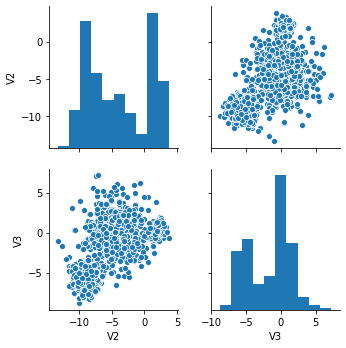

In [6]:
sns.pairplot(varied)

In [7]:
from sklearn.cluster import KMeans

# Elbow method
distortions = []

for k in range(1, 11):
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(varied)
    distortions.append(kmeanModel.inertia_)

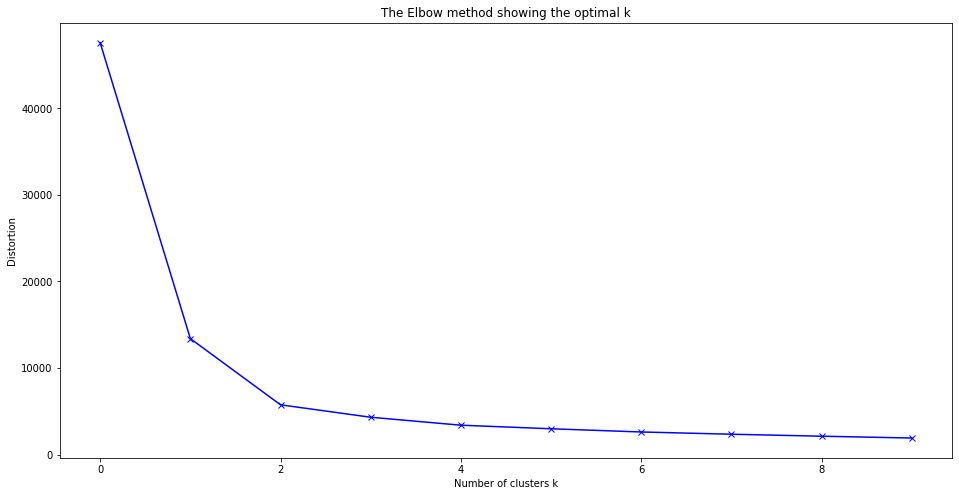

In [11]:
# Plot elbow method
plt.figure(figsize = (16, 8))
plt.plot(distortions, 'bx-')
plt.xlabel('Number of clusters k')
plt.ylabel('Distortion')
plt.title('The Elbow method showing the optimal k')
plt.show()

In [12]:
from sklearn.metrics import silhouette_score

# Silhouette method
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(varied)
    score = silhouette_score(varied, kmeanModel.labels_)
    silhouette_coefficients.append(score)

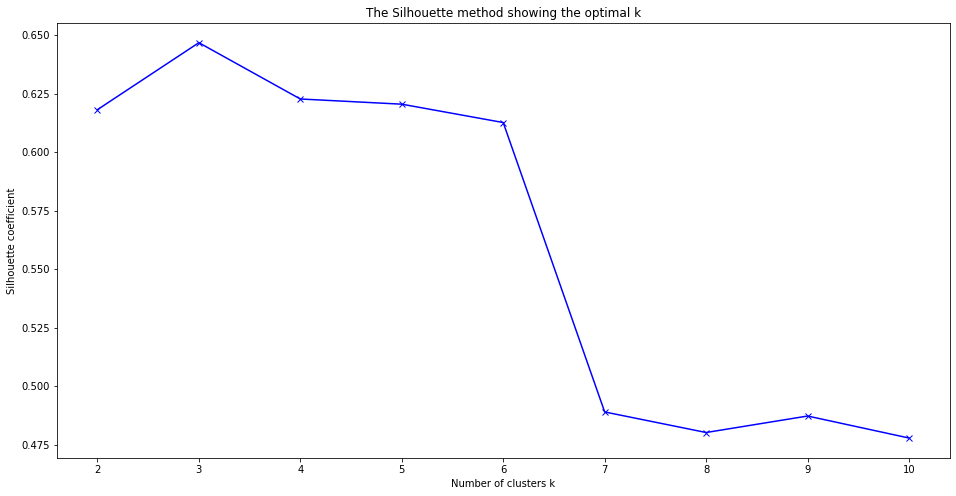

In [13]:
# Plot silhouette method
plt.figure(figsize = (16, 8))
plt.plot(range(2, 11), silhouette_coefficients, 'bx-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette coefficient')
plt.title('The Silhouette method showing the optimal k')
plt.show()